## LAB2: Classificadores baseados em distâncias entre pontos

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Diogo Lobo
## Número: 48168

<hr style="border:1px  solid black"> </hr>

### Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

## IMPORTANTE:
### Uma vez completado, grave este Jupyter notebook com o seguinte nome:
### Axxxxx-Lab2.ipynb (Axxxxx: número de aluno)
###  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab2-data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "data":          dados bi-dimensionais (4000 amostras)
### 2. "target":       classe dos dados (inteiros de 0 a 3)
### 3. "foldTrain":  array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest":   array boleano indicando os dados a serem usados para testar os classificadores


<hr style="border:2px solid black"> </hr>

## Tarefa 1 - Classificadores da distância ao centroide:
### 1. Use os dados de treino para estimar os centroides de cada classe. Imprima os valores obtidos para cada classe, indicando a classe em questão.
### 2. Com a métrica de distância euclideana, calcule a matriz de confusão e o número total de erros nos dados de teste.
### 3. Explique brevemente porque é que mais de metade dos pontos da classe "1" não são bem classificados 

In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
import scipy.spatial.distance as spd
D=pickle.load(open('Lab2-data.p','rb'))
print(D.keys())

dict_keys(['data', 'target', 'foldTrain', 'foldTest'])


In [200]:
X = D['data']
y = D['target']
f1 = D['foldTrain']
f2 = D['foldTest']

In [201]:
X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

In [202]:
m0 = np.mean(X1[:,y1==0],axis=1)
m1 = np.mean(X1[:,y1==1],axis=1)
m2 = np.mean(X1[:,y1==2],axis=1)
m3 = np.mean(X1[:,y1==3],axis=1)

### Pergunta 1.1

Text(0.5, 1.0, 'Conjunto Completo')

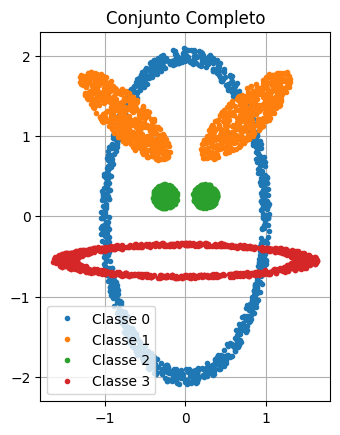

In [203]:
plt.plot(X[0,y==0],X[1,y==0],'.',label='Classe 0')
plt.plot(X[0,y==1],X[1,y==1],'.',label='Classe 1')
plt.plot(X[0,y==2],X[1,y==2],'.',label='Classe 2')
plt.plot(X[0,y==3],X[1,y==3],'.',label='Classe 3')
plt.legend(loc='lower left')
plt.axis('scaled')
plt.grid(True)
plt.title('Conjunto Completo')

Centroide classe 0 --> [-0.13243819  0.03660923]
Centroide classe 1 --> [-0.13243819  0.03660923]
Centroide classe 2 --> [-0.13243819  0.03660923]
Centroide classe 3 --> [-0.13243819  0.03660923]


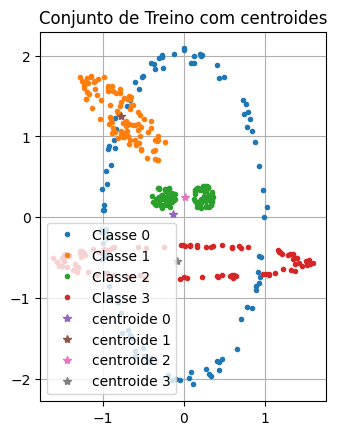

In [204]:
plt.plot(X1[0,y1==0],X1[1,y1==0],'.',label='Classe 0')
plt.plot(X1[0,y1==1],X1[1,y1==1],'.',label='Classe 1')
plt.plot(X1[0,y1==2],X1[1,y1==2],'.',label='Classe 2')
plt.plot(X1[0,y1==3],X1[1,y1==3],'.',label='Classe 3')
plt.plot(m0[0],m0[1],'*',label='centroide 0')
plt.plot(m1[0],m1[1],'*',label='centroide 1')
plt.plot(m2[0],m2[1],'*',label='centroide 2')
plt.plot(m3[0],m3[1],'*',label='centroide 3')
plt.legend(loc='lower left')
plt.axis('scaled')
plt.grid(True)
plt.title('Conjunto de Treino com centroides')
print('Centroide classe 0 -->',m0)
print('Centroide classe 1 -->',m0)
print('Centroide classe 2 -->',m0)
print('Centroide classe 3 -->',m0)

### Pergunta 1.2

In [205]:
D0 = np.sqrt(np.sum((X2-m0[:,np.newaxis])**2,axis=0))
D1 = np.sqrt(np.sum((X2-m1[:,np.newaxis])**2,axis=0))
D2 = np.sqrt(np.sum((X2-m2[:,np.newaxis])**2,axis=0))
D3 = np.sqrt(np.sum((X2-m3[:,np.newaxis])**2,axis=0))
D = np.vstack((D0,D1,D2,D3))
y1e = np.argmin(D,axis=0)
MC = confusion_matrix(y2,y1e)
print(MC)
print(np.sum(y2!=y1e))

[[ 49 283 151 417]
 [  0 376 524   0]
 [266   0 634   0]
 [  0   0   0 900]]
1641


### Pergunta 1.3

#### Mais de metade do conjunto da classe 1 não é bem classificada por os dados de treino apenas existirem de um lado enquanto que os dados de teste existem nos dois podendo se observar também pelo centroide da classe de treino está no lado esquerdo nunca irá chegar ao lado direito
####  Pode-se observar melhor no gráfico embaixo onde se pode comparar os dados totais com os dados de treino e o centroide

Text(0.5, 1.0, 'Classe 1- Comparação entre total e teste')

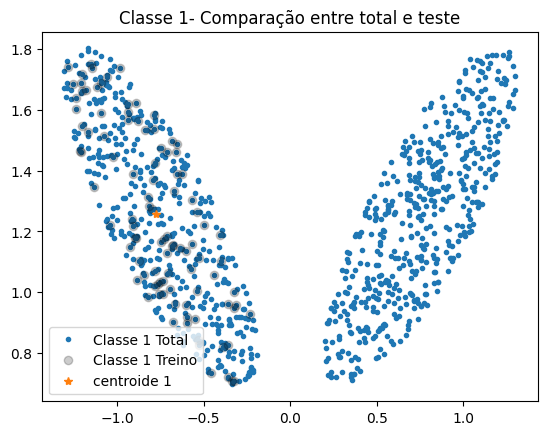

In [206]:
plt.plot(X[0,y==1],X[1,y==1],'.',label='Classe 1 Total')
plt.plot(X1[0,y1==1],X1[1,y1==1],'ok',alpha=.2,label='Classe 1 Treino')
plt.plot(m1[0],m1[1],'*',label='centroide 1')
plt.legend(loc='lower left')
plt.title('Classe 1- Comparação entre total e teste')

## Tarefa 2 - Classificadores dos k-vizinhos mais próximos:
### (Use os dados de treino nestes classificadores)
### 1. Para k=1, calcule a matriz de confusão e o número total de erros nos dados de teste. 
### 2. Faça um plot dos dados de teste por classe e dos erros cometidos por este classificador.
### 3. Repita as duas alíneas anteriores para k=5

In [207]:
from sklearn.neighbors import KNeighborsClassifier

### Pergunta 2.1

In [208]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T,y1)
y2e = knn.predict(X2.T)
print('Numero total de erros -->',np.sum(y2e!=y2))
print(confusion_matrix(y2,y2e))

Numero total de erros --> 601
[[837  35   0  28]
 [469 402  29   0]
 [  0   0 900   0]
 [ 40   0   0 860]]


### Pergunta 2.2

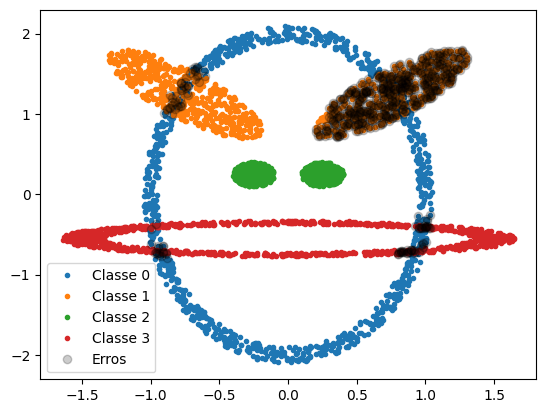

In [209]:
plt.plot(X[0,y==0],X[1,y==0],'.',label='Classe 0')
plt.plot(X[0,y==1],X[1,y==1],'.',label='Classe 1')
plt.plot(X[0,y==2],X[1,y==2],'.',label='Classe 2')
plt.plot(X[0,y==3],X[1,y==3],'.',label='Classe 3')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.legend(loc='lower left')


### Pergunta 2.3

In [210]:
knn = KNeighborsClassifier(n_neighbors=5).fit(X1.T,y1)
y2e = knn.predict(X2.T)
print('Numero total de erros -->',np.sum(y2e!=y2))
print(confusion_matrix(y2,y2e))

Numero total de erros --> 639
[[784  50   0  66]
 [459 400  41   0]
 [  0   0 900   0]
 [ 23   0   0 877]]


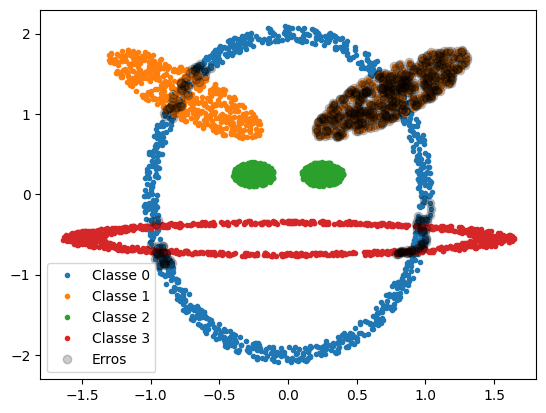

In [211]:
plt.plot(X[0,y==0],X[1,y==0],'.',label='Classe 0')
plt.plot(X[0,y==1],X[1,y==1],'.',label='Classe 1')
plt.plot(X[0,y==2],X[1,y==2],'.',label='Classe 2')
plt.plot(X[0,y==3],X[1,y==3],'.',label='Classe 3')
plt.plot(X2[0,y2!=y2e], X2[1,y2!=y2e], 'ok', alpha=0.2, label='Erros')
plt.legend(loc='lower left')

## Tarefa 3 - Matrizes de distância:
### Considere os dados "digits" do sklearn ()
### 1. Ordene os dados por classe, calcule e visualize a matriz de distâncias para o conjunto de dados, usando a distância euclideana
### 2. Repita a alínea anterior para a distância de cosseno

In [212]:
import sklearn.datasets as dt
D=dt.load_digits()
X=D.data
y=D.target

Nº de classes--> [0 1 2 3 4 5 6 7 8 9]


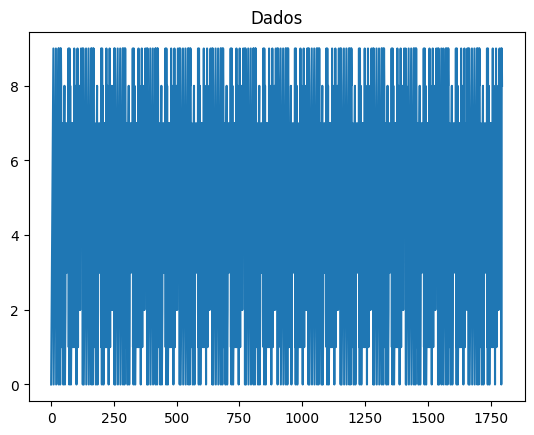

In [213]:
print('Nº de classes-->', np.unique(y))
plt.title('Dados')
plt.plot(y)
plt.show()


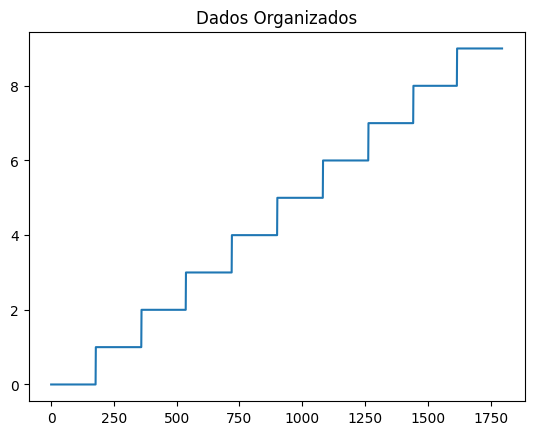

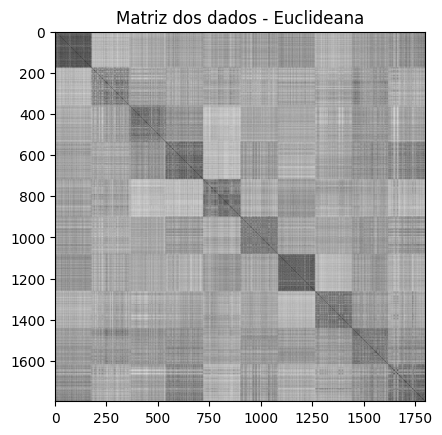

In [214]:
#Organizar os dados por classe
Y_ordered = np.argsort(y)
X_ordered = X[Y_ordered,:]
Y_ordered = y[Y_ordered]


plt.title('Dados Organizados')
plt.plot(Y_ordered)
plt.show()


D1 = spd.squareform(spd.pdist(X_ordered,'euclidean'))


plt.title('Matriz dos dados - Euclideana')
plt.imshow(D1,cmap='gray')


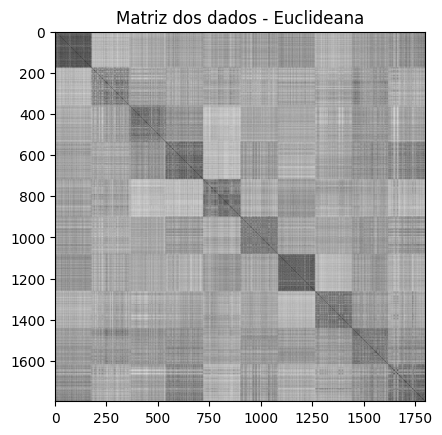

In [215]:
D1 = spd.squareform(spd.pdist(X_ordered,'euclidean'))

plt.title('Matriz dos dados - Euclideana')
plt.imshow(D1,cmap='gray')

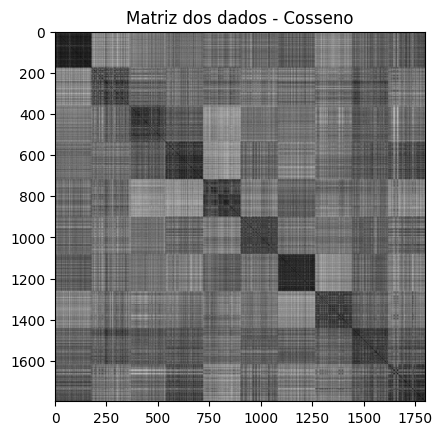

In [216]:
D2 = spd.squareform(spd.pdist(X_ordered,'cosine'))
plt.title('Matriz dos dados - Cosseno')
plt.imshow(D2,cmap='gray')